Parcial 1: Fundamentos de Aprendizaje de Maquina

Autor: William Andrés Gómez Roa

06/09/2024

# **K-NEIREST NEIGHBOR**

**Objetivo:** Clasificación de los pacientes como pertenecientes a una de dos categorías: **Normal o Anormal (Hernia discal o Espondilolistesis)**.

Dataset: Biomecánica-Ortopedia.csv

Descripciones de los campos:

Cada paciente está representado en el conjunto de datos por seis atributos biomecánicos derivados de la forma y orientación de la pelvis y la columna lumbar (cada uno es una columna):
1. **pelvic_incidence**: incidencia pélvica
2. **pelvic_tilt_numeric**: inclinación pélvica
3. **lumbar_lordosis_angle**: ángulo de lordosis lumbar
4. **sacral_slope**: inclinación sacra
5. **pelvic_radius**: radio pélvico
6. **degree_spondylolisthesis**: grado de espondilolistesis
7. ***class***: clasificación del paciente

**Preguntas:**
1. (6) Encuentre el mejor valor de K desde el punto de vista de ACCURACY. Evalúe el desempeño del modelo con dicho valor.
2. (7) Plantee un valor de K que lleve a un overfitting. Explique porqué se da el overfitting.
3. (7) Plantee un valor de K que lleve a un underfitting. Explique porqué se da el underfitting.

# **SOLUCION**

In [44]:
SEED <- 837

In [43]:
biomecanica <- read.csv("/content/Biomecánica-Ortopedia.csv")
str(biomecanica)

'data.frame':	310 obs. of  7 variables:
 $ pelvic_incidence        : num  63 39.1 68.8 69.3 49.7 ...
 $ pelvic_tilt.numeric     : num  22.55 10.06 22.22 24.65 9.65 ...
 $ lumbar_lordosis_angle   : num  39.6 25 50.1 44.3 28.3 ...
 $ sacral_slope            : num  40.5 29 46.6 44.6 40.1 ...
 $ pelvic_radius           : num  98.7 114.4 106 101.9 108.2 ...
 $ degree_spondylolisthesis: num  -0.254 4.564 -3.53 11.212 7.919 ...
 $ class                   : chr  "Abnormal" "Abnormal" "Abnormal" "Abnormal" ...


In [3]:
biomecanica$class<- as.factor(biomecanica$class)

1.
- Encuentre el mejor valor de K desde el punto de vista de ACCURACY. (encontrar el "mejor" valor de K implica hacer validacion cruzada)
- Evalúe el desempeño del modelo con dicho valor.

In [4]:
str(biomecanica)

'data.frame':	310 obs. of  7 variables:
 $ pelvic_incidence        : num  63 39.1 68.8 69.3 49.7 ...
 $ pelvic_tilt.numeric     : num  22.55 10.06 22.22 24.65 9.65 ...
 $ lumbar_lordosis_angle   : num  39.6 25 50.1 44.3 28.3 ...
 $ sacral_slope            : num  40.5 29 46.6 44.6 40.1 ...
 $ pelvic_radius           : num  98.7 114.4 106 101.9 108.2 ...
 $ degree_spondylolisthesis: num  -0.254 4.564 -3.53 11.212 7.919 ...
 $ class                   : Factor w/ 2 levels "Abnormal","Normal": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# PREPROCESAMIENTO DEL DATASET

  # - No se requieren variables dummies
  # - Estandarizar?
  # - Equilibrio en clases a predecir?


In [6]:
# DATASET DE ENTRENAMIENTO & DATASET DE PRUEBA
#Dataset de entrenamiento y prueba
set.seed(SEED)
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 75% de los casos
sample <- sample.int(nrow(biomecanica), floor(.75*nrow(biomecanica)))
biomecanica.train <- biomecanica[sample, ]
biomecanica.test <- biomecanica[-sample, ]

biomecanica.train1 <- biomecanica.train
biomecanica.test1 <- biomecanica.test

In [7]:
str(biomecanica.train)

'data.frame':	232 obs. of  7 variables:
 $ pelvic_incidence        : num  46.2 48 61.4 44.3 48.8 ...
 $ pelvic_tilt.numeric     : num  10.06 3.97 25.38 1.1 18.02 ...
 $ lumbar_lordosis_angle   : num  37 58.3 39.1 38 52 ...
 $ sacral_slope            : num  36.2 44.1 36 43.2 30.8 ...
 $ pelvic_radius           : num  128.1 125.4 103.4 98.3 139.2 ...
 $ degree_spondylolisthesis: num  -5.1 35 21.8 23.9 10.4 ...
 $ class                   : Factor w/ 2 levels "Abnormal","Normal": 2 1 1 1 2 2 2 1 1 1 ...


### **VALIDACION CRUZADA** : Encontrar el mejor valor de K segun el "Accuracy"

In [9]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [10]:
# creo parámetros de validación cruzada
set.seed(SEED)

cross<-trainControl(method="cv",number=10)
modeloknn1<-train(class~.,method="knn",
                  tuneGrid=expand.grid(k=1:100),
                  trControl=cross,
                  metric="Accuracy",
                  data=biomecanica.train)

In [11]:
modeloknn1

k-Nearest Neighbors 

232 samples
  6 predictor
  2 classes: 'Abnormal', 'Normal' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 209, 210, 209, 209, 209, 208, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa    
    1  0.8182148  0.5855310
    2  0.7975791  0.5411736
    3  0.8321805  0.6161223
    4  0.8367424  0.6370227
    5  0.8233037  0.5951321
    6  0.8234848  0.5876909
    7  0.8229249  0.5978148
    8  0.8274704  0.6103773
    9  0.8060935  0.5618545
   10  0.8359848  0.6280360
   11  0.8102602  0.5827210
   12  0.7926713  0.5338365
   13  0.8316370  0.6233186
   14  0.8231225  0.5997681
   15  0.8407279  0.6417597
   16  0.8191535  0.5989044
   17  0.8233202  0.6058587
   18  0.8276680  0.6165474
   19  0.8318347  0.6258908
   20  0.8321970  0.6233968
   21  0.8149868  0.5874659
   22  0.8233202  0.6043169
   23  0.8023057  0.5545739
   24  0.8023057  0.5590232
   25  0.8064723  0.5665617
   26  0.8064723  0.56405

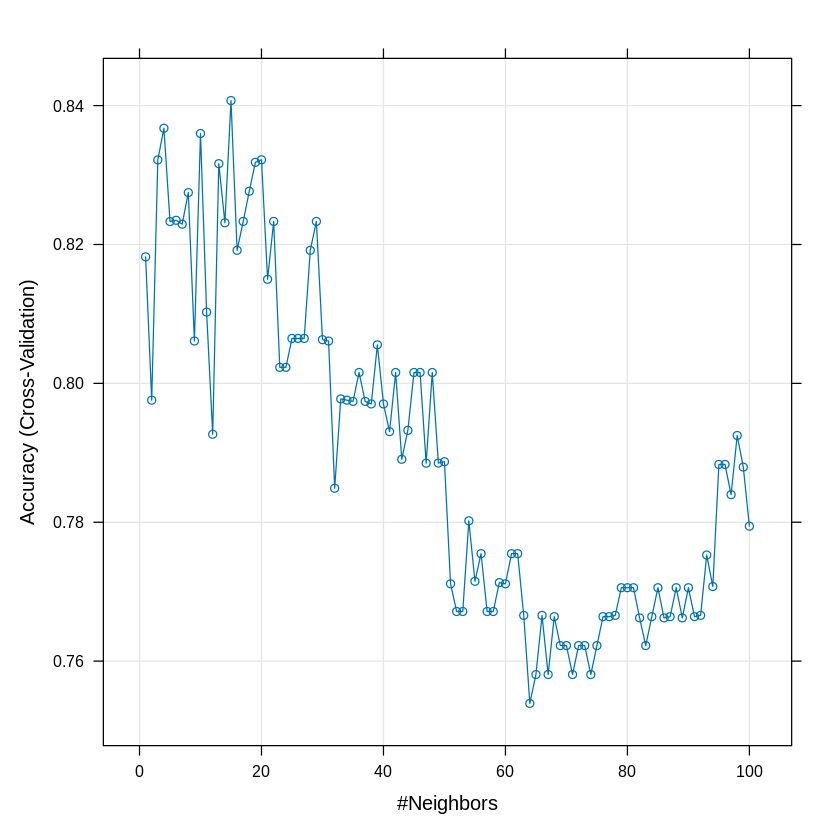

In [12]:
plot(modeloknn1)

In [41]:
# Recode the 'class' factor to 0 = "Abnormal", 1 = "Normal"
biomecanica.train1$class <- factor(biomecanica.train1$class, levels = c("Abnormal", "Normal"), labels = c(0, 1))
biomecanica.test1$class <- factor(biomecanica.test1$class, levels = c("Abnormal", "Normal"), labels = c(0, 1))

In [38]:
str(biomecanica.train1)

'data.frame':	232 obs. of  7 variables:
 $ pelvic_incidence        : num  46.2 48 61.4 44.3 48.8 ...
 $ pelvic_tilt.numeric     : num  10.06 3.97 25.38 1.1 18.02 ...
 $ lumbar_lordosis_angle   : num  37 58.3 39.1 38 52 ...
 $ sacral_slope            : num  36.2 44.1 36 43.2 30.8 ...
 $ pelvic_radius           : num  128.1 125.4 103.4 98.3 139.2 ...
 $ degree_spondylolisthesis: num  -5.1 35 21.8 23.9 10.4 ...
 $ class                   : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 2 1 1 1 ...


In [36]:
# MODELO CON K = 15
set.seed(SEED)

test_pred = knn3(class~., data=biomecanica.train1, k = 15)

In [42]:
predmod <- predict(test_pred, biomecanica.test1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          biomecanica.test1$class, positive = "1")
confknn$table

          Reference
Prediction  0  1
         0 47  5
         1  4 22

In [46]:
conf_matrix <- confknn$table
# Extraer valores
TP <- conf_matrix[2, 2]  # Verdaderos positivos
FP <- conf_matrix[1, 2]  # Falsos positivos
TN <- conf_matrix[1, 1]  # Verdaderos negativos
FN <- conf_matrix[2, 1]  # Falsos negativos

# Calcular precisión y exhaustividad
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)

# Calcular el F1-score
f1_score <- 2 * (precision * recall) / (precision + recall)
print(paste("F1-Score:", f1_score))

[1] "F1-Score: 0.830188679245283"


# **RESPUESTA**

1. El mejor valor de K segun la medida de 'Accuracy' es K=15. El desempeño de este modelo nos da un F1= 0.83

2. (7) Plantee un valor de K que lleve a un overfitting. Explique porqué se da el overfitting.

El sobreajuste suele ocurrir con valores bajos de k, como **k=1**, porque el modelo se basa en un solo vecino, reaccionando excesivamente a variaciones menores o ruido en los datos.

3. (7) Plantee un valor de K que lleve a un underfitting. Explique porqué se da el underfitting.

El underfitting ocurre cuando k es muy alto, ya que el modelo se vuelve demasiado general y no captura las relaciones complejas en los datos. Esto sucede porque al promediar demasiadas observaciones, el modelo no se ajusta bien ni al conjunto de entrenamiento ni al de prueba.
K=40
